In [17]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
import scipy as sp
from scipy.stats import boxcox
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

Drill: fixing assumptions
Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality. Use the cell(s) below to see what you can do to fix it.


### Assumption four: low multicollinearity

Correlations among features should be low or nonexistent.  When features are correlated, they may both explain the same pattern of variance in the outcome.  The model will attempt to find a solution, potentially by attributing half the explanatory power to one feature and half to the other.  This isn’t a problem if our only goal is prediction, because then all that matters is that the variance gets explained.  However, if we want to know which features matter most when predicting an outcome, multicollinearity can cause us to underestimate the relationship between features and outcomes.

Multicollinearity can be fixed by PCA or by discarding some of the correlated features.

In [3]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


('\nCoefficients: \n', array([[ 0.04576465,  0.18853002, -0.00103749]]))
('\nIntercept: \n', array([2.93888937]))

R-squared:
0.8972106381789521


In [7]:
#Transformations
data["logTV"] = [0 if x == 0 else np.log(x) for x in data["TV"]]

In [8]:
data["logNewspaper"] = [0 if x == 0 else np.log(x) for x in data["Newspaper"]]

In [9]:
data["logRadio"] = [0 if x == 0 else np.log(x) for x in data["Radio"]]

In [10]:
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['logTV','logRadio','logNewspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

('\nCoefficients: \n', array([[3.82637999, 2.50121695, 0.1192783 ]]))
('\nIntercept: \n', array([-11.18883801]))

R-squared:
0.8204065441390211


(array([ 1.,  0.,  1.,  3.,  6., 12., 12., 27., 41., 97.]),
 array([-0.35667494,  0.24816354,  0.85300202,  1.45784051,  2.06267899,
         2.66751747,  3.27235596,  3.87719444,  4.48203293,  5.08687141,
         5.69170989]),
 <a list of 10 Patch objects>)

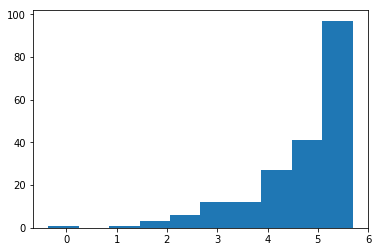

In [11]:
plt.hist(data.logTV)

(array([ 1.,  1.,  2.,  5., 10., 24., 28., 55., 56., 18.]),
 array([-1.2039728 , -0.60995568, -0.01593855,  0.57807857,  1.1720957 ,
         1.76611282,  2.36012995,  2.95414707,  3.5481642 ,  4.14218132,
         4.73619845]),
 <a list of 10 Patch objects>)

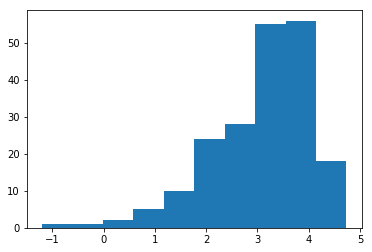

In [12]:
plt.hist(data.logNewspaper)

(array([ 2.,  1.,  2.,  9., 10., 13., 16., 29., 47., 71.]),
 array([-1.2039728 , -0.69317644, -0.18238008,  0.32841629,  0.83921265,
         1.35000901,  1.86080538,  2.37160174,  2.88239811,  3.39319447,
         3.90399083]),
 <a list of 10 Patch objects>)

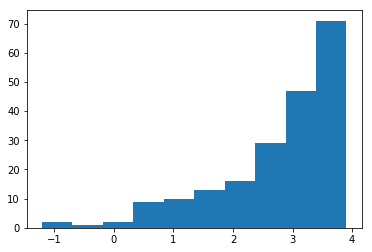

In [13]:
plt.hist(data.logRadio)

(array([30., 20., 21., 17., 18., 23., 14., 21., 21., 15.]),
 array([ 0.  ,  4.96,  9.92, 14.88, 19.84, 24.8 , 29.76, 34.72, 39.68,
        44.64, 49.6 ]),
 <a list of 10 Patch objects>)

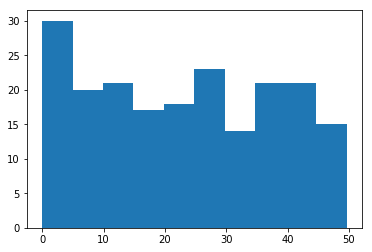

In [15]:
plt.hist(data.Radio)

In [26]:
# Create a feature using a non-linear transformation.
data["sqrtTV"] = [math.sqrt(x) for x in data["TV"]]

In [27]:
data["sqrtNewspaper"] = [math.sqrt(x) for x in data["Newspaper"]]

In [31]:
data["sqrtRadio"] = [math.sqrt(x) for x in data["Radio"]]

(array([ 3.,  9., 15., 11., 21., 19., 23., 25., 47., 27.]),
 array([ 0.83666003,  2.47462116,  4.1125823 ,  5.75054343,  7.38850457,
         9.0264657 , 10.66442683, 12.30238797, 13.9403491 , 15.57831024,
        17.21627137]),
 <a list of 10 Patch objects>)

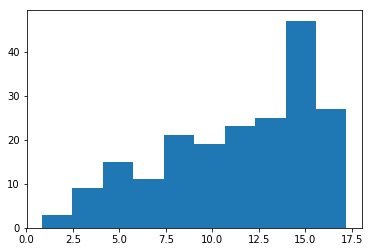

In [28]:
plt.hist(data.sqrtTV)

(array([ 8., 16., 27., 28., 35., 34., 27., 18.,  5.,  2.]),
 array([ 0.54772256,  1.56065813,  2.5735937 ,  3.58652927,  4.59946484,
         5.6124004 ,  6.62533597,  7.63827154,  8.65120711,  9.66414268,
        10.67707825]),
 <a list of 10 Patch objects>)

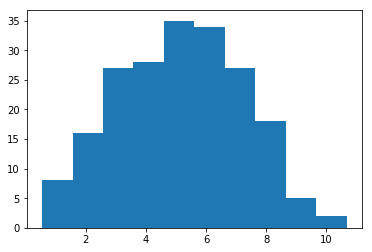

In [29]:
plt.hist(data.sqrtNewspaper)

(array([ 3.,  7., 18., 14., 20., 20., 22., 29., 32., 35.]),
 array([0.        , 0.70427267, 1.40854535, 2.11281802, 2.8170907 ,
        3.52136337, 4.22563605, 4.92990872, 5.6341814 , 6.33845407,
        7.04272674]),
 <a list of 10 Patch objects>)

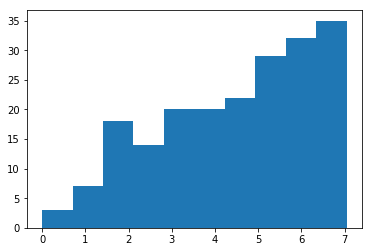

In [32]:
plt.hist(data.sqrtRadio)

In [33]:
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['sqrtTV','sqrtRadio','sqrtNewspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

('\nCoefficients: \n', array([[0.96780469, 1.55683139, 0.04403645]]))
('\nIntercept: \n', array([-4.22436341]))

R-squared:
0.9083730830119968
